# Introduction to features effecting water portability

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.
 
 
1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
 
 
2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
 
 
3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
 
 
4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
 
 
5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
 
 
6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
 
 
7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
 
 
8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
 
 
9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
 
 
10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable. 

In [219]:
#importing required library, ofcourse pandas is included
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
plt.style.use('ggplot')

#impoting the machine learning modules
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn import linear_model
import xgboost
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

#to make the graphs and plots embedded in the notebook
%matplotlib inline

In [220]:
#importing the raw data form the source
rawData = pd.read_csv('https://raw.githubusercontent.com/Tejasmallikarjuncj/waterpota/main/water_potability.csv')
print(rawData.shape)
rawData.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Describing the raw Data
Let's find the statistical properties of the features

In [221]:
#finding the statistical properties of the data
rawData.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Let's find the total potability sample
Here,

0 = non-potable

1 = potable

In [222]:
#let's find the percentage of potable samples
All = rawData.shape[0]
potable = rawData[rawData['Potability'] == 1]
nonPotable = rawData[rawData['Potability'] == 0]

x = len(potable)/All
y = len(nonPotable)/All

print('potable :',x*100,'%')
print('non-potable :',y*100,'%')

potable : 39.010989010989015 %
non-potable : 60.98901098901099 %


# Visualizing the raw data

Let's visualizing the raw features before cleaning it.

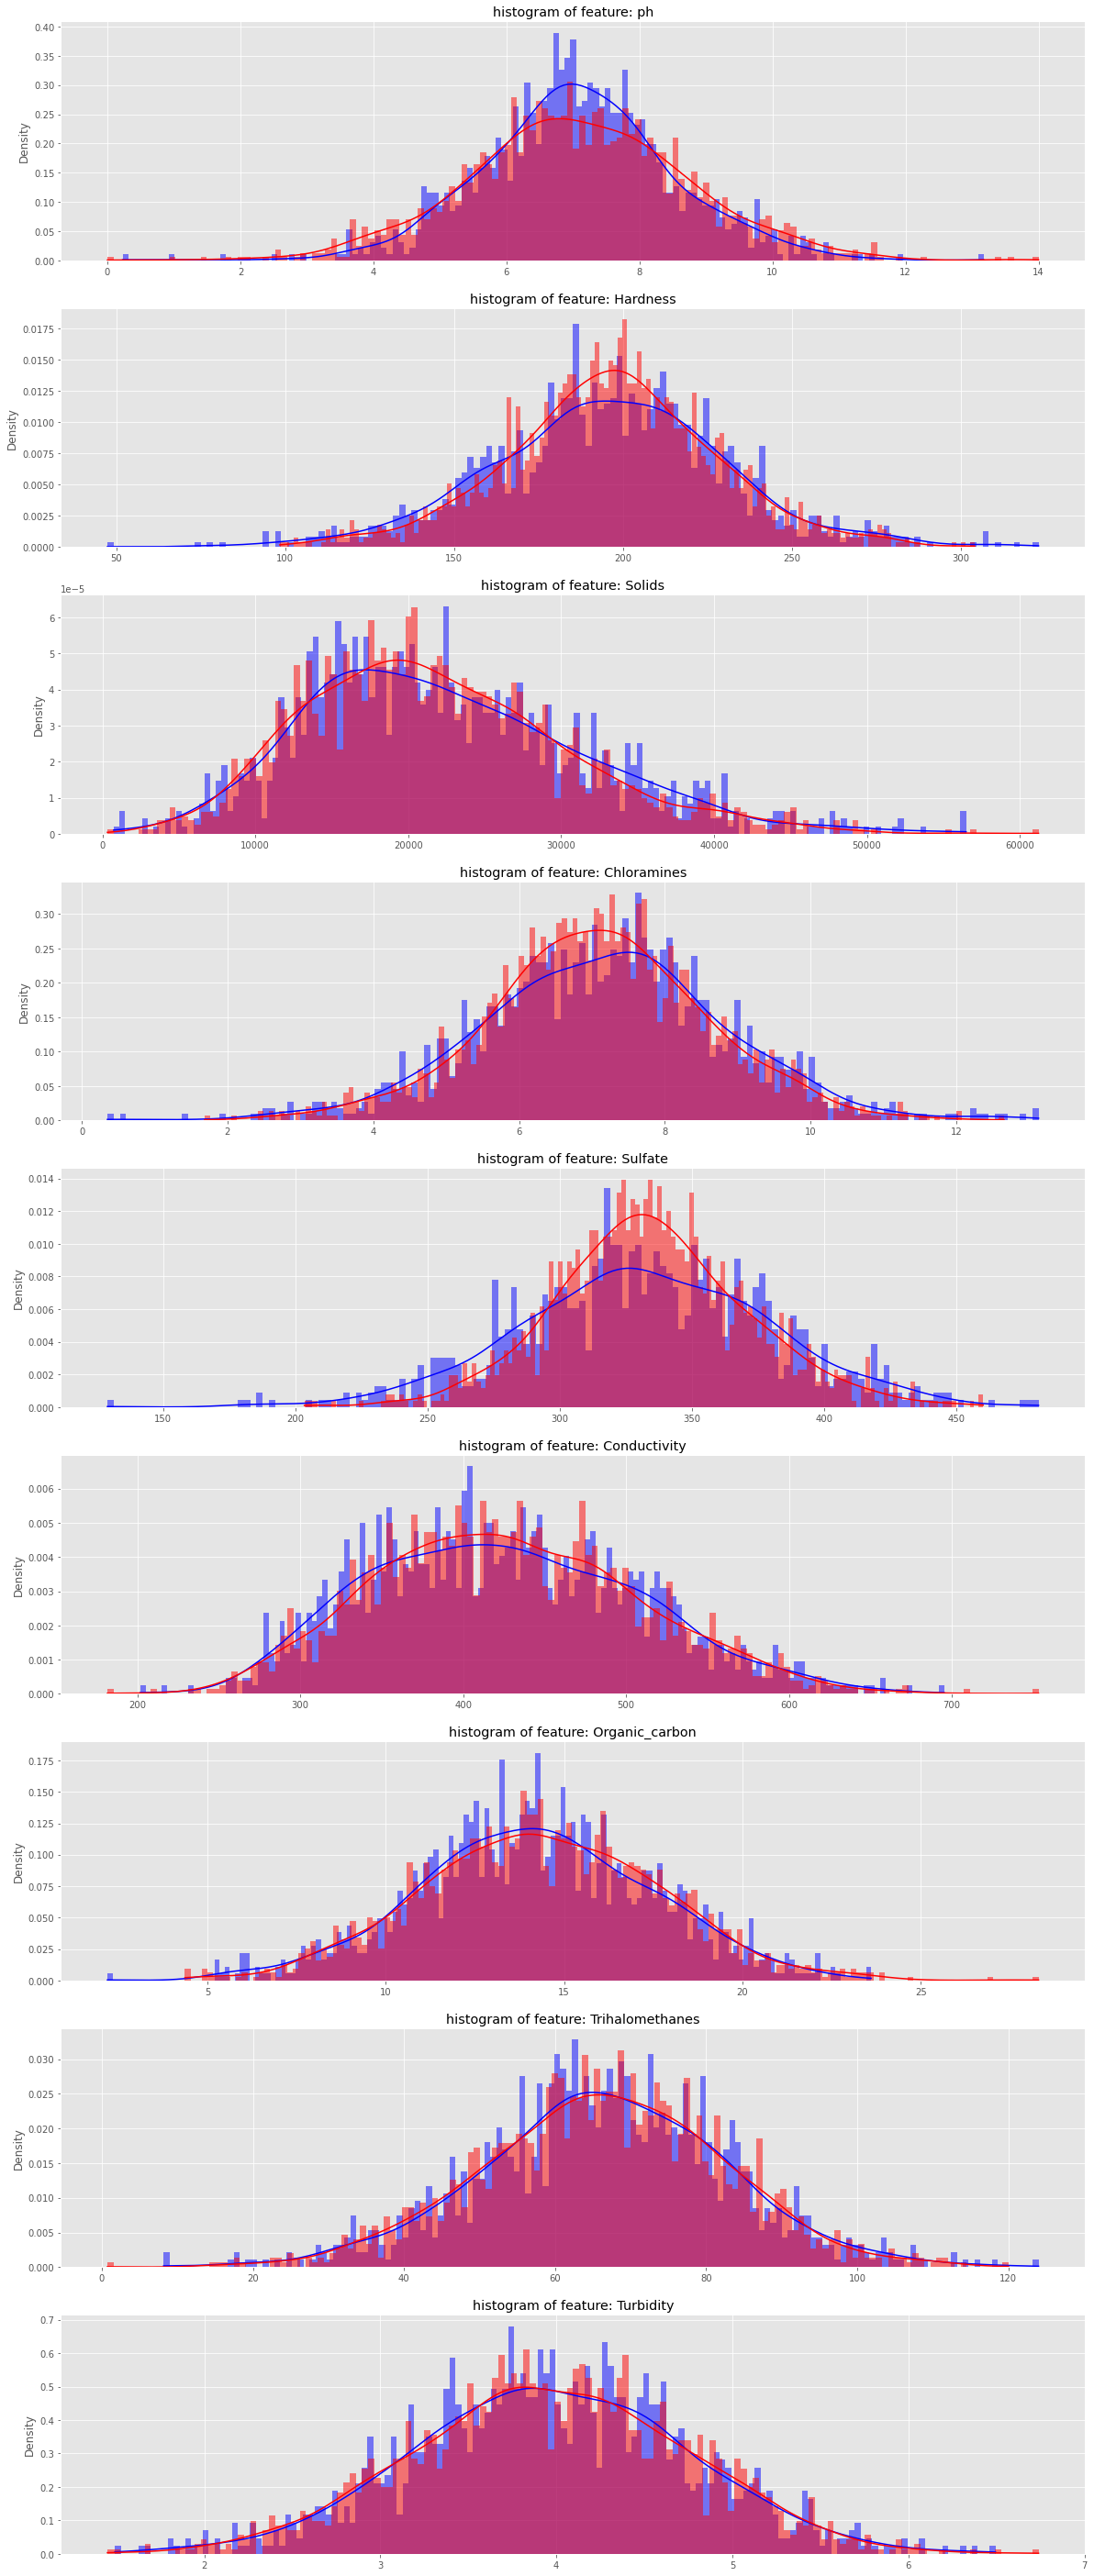

In [223]:
#visualizing features the histogram
features = rawData.iloc[:,0:9].columns


plt.figure(figsize=(20,20*8))
gs = GridSpec(28, 1)
for i, cn in enumerate(rawData[features]):
    ax = plt.subplot(gs[i])
    f1 = sns.histplot(rawData[cn][rawData.Potability == 1], bins=150,color = 'blue',kde=True, stat="density", linewidth=0)
    f2 = sns.histplot(rawData[cn][rawData.Potability == 0], bins=150,color = 'red',kde=True, stat="density", linewidth=0)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Here the red curve showes the features distribution which has the potability of 'zero' and bule shows the potability of 'one'

# Cleaning the data
We will drop all the rows which contain Nan in pH,Turbidity and Solids, for the rest we will replace it with mean value of the columns

In [224]:
#cleaning the data and rejusting the indexes
rawData.dropna(subset=['ph','Turbidity','Solids','Sulfate'],axis=0,inplace=True)
rawData.index = range(1,rawData.shape[0]+1) 
print(rawData.isnull().sum(),"\n")
print("The shape of the cleared data is: ",rawData.shape,"")

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    105
Turbidity            0
Potability           0
dtype: int64 

The shape of the cleared data is:  (2116, 10) 


In [225]:
#we will replace the NaN values in Trihalomethanes
rawData['Trihalomethanes'].interpolate(inplace=True)
rawData.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Before going to the feature extraction part we have we will see how the data looks and it's description.

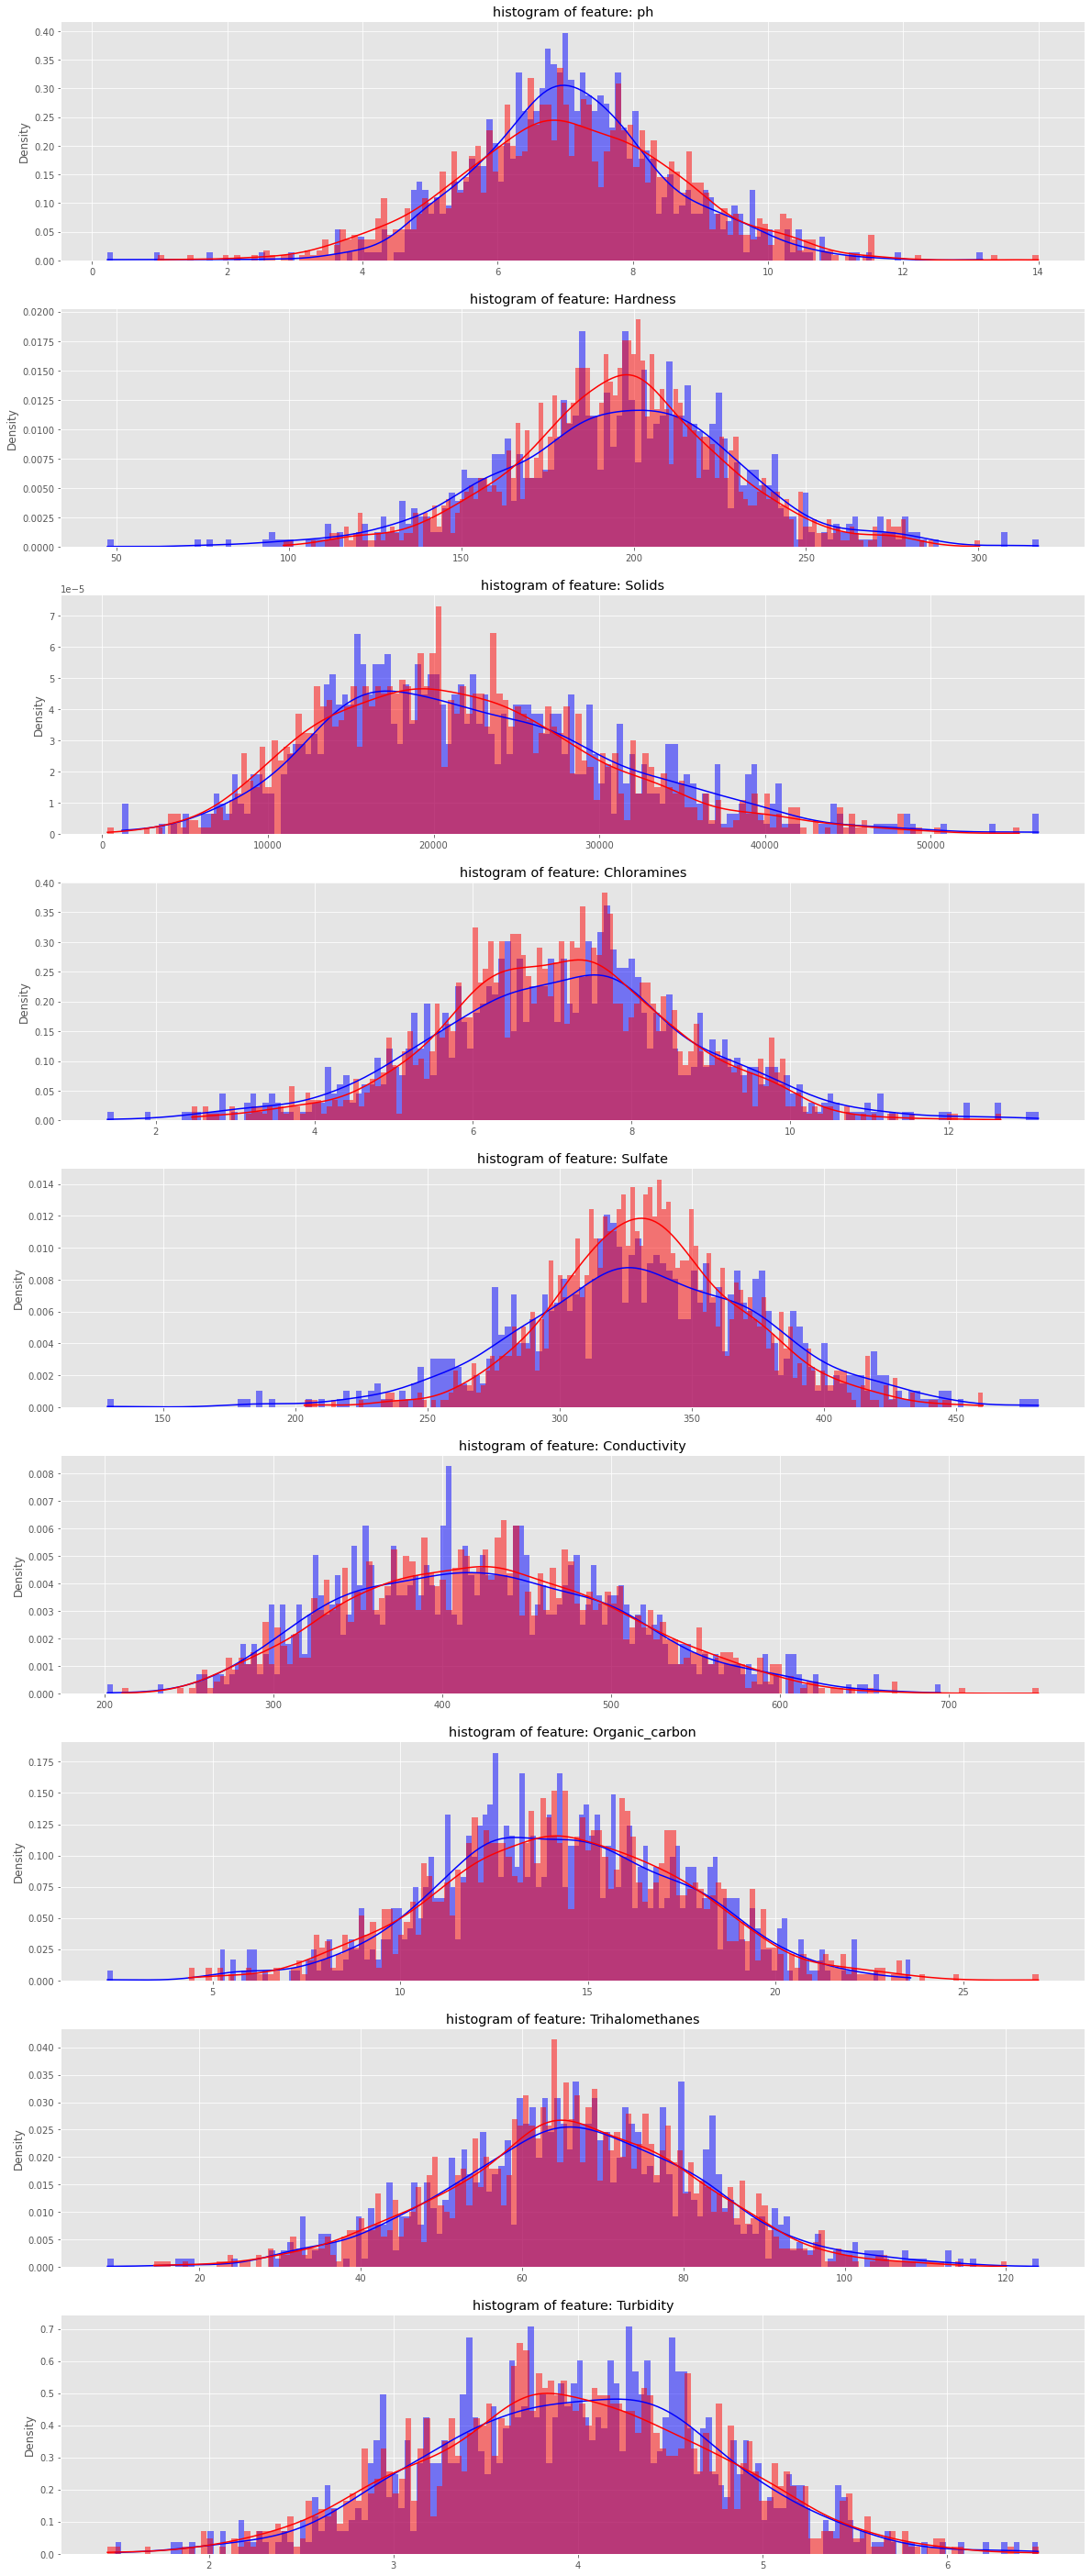

In [226]:
#visualizing features the histogram
plt.figure(figsize=(20,20*8))
gs = GridSpec(28, 1)
for i, cn in enumerate(rawData[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(rawData[cn][rawData.Potability == 1], bins=150,color = 'blue',kde=True, stat="density", linewidth=0)
    sns.histplot(rawData[cn][rawData.Potability == 0], bins=150,color = 'red',kde=True, stat="density", linewidth=0)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Here the red curve showes the features distribution which has the potability of 'zero' and bule shows the potability of 'one'

In [227]:
#discrbing the data
copyData = rawData.copy()
rawData.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,7.083824,195.920219,22015.192720,7.125917,333.312912,425.979215,14.349405,66.437829,3.969878,0.400284
std,1.586245,32.760861,8686.584143,1.589125,41.083397,80.724078,3.315629,15.892602,0.785557,0.490072
min,0.227499,47.432000,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089079,176.832962,15666.690300,6.121864,307.706750,365.842780,12.118659,56.322521,3.436360,0.000000
50%,7.027241,197.103467,21041.034770,7.138343,332.477743,423.156807,14.298910,66.547677,3.966109,0.000000
75%,8.064291,216.122276,27353.621742,8.105680,359.267357,481.545011,16.665328,77.134443,4.521985,1.000000
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


# Prediction before normalization
We will be using the logistic regression to pridict the output

In [228]:
x = rawData.drop(['Potability'],axis=1)
y = rawData.Potability

X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)
model1 = linear_model.LogisticRegression()

model1.fit(X_train, y_train)
y_pred=model1.predict(X_train)
print(np.array(y_pred).sum())
print(len(y_pred))

19
1587


# Feature extraction

The cleaning step is done.Now we have to extract the useful and effective features and use it to model a classifictional algorithm.
As the problem is solve the classfy the water sample into potable and non-potable. 
First step is to normalize the features.

In [229]:
#rounding all the vlaues to three decimal place
rawData = rawData.round(3)
rawData.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,8.317,214.373,22018.417,8.059,356.886,363.267,18.437,100.342,4.629,0
2,9.092,181.102,17978.986,6.547,310.136,398.411,11.558,31.998,4.075,0
3,5.584,188.313,28748.688,7.545,326.678,280.468,8.400,54.918,2.560,0
4,10.224,248.072,28749.717,7.513,393.663,283.652,13.790,84.604,2.673,0
5,8.636,203.362,13672.092,4.563,303.310,474.608,12.364,62.798,4.401,0


Here sloids  = Chloramines + sulfates + Oreagnic_carbon
so, I will just substract the below from sloids

In [230]:
rawData['Solids'] = rawData['Solids'] - (rawData['Chloramines'] + rawData['Sulfate'] + rawData['Organic_carbon'])
rawData.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,8.317,214.373,21635.035,8.059,356.886,363.267,18.437,100.342,4.629,0
2,9.092,181.102,17650.745,6.547,310.136,398.411,11.558,31.998,4.075,0
3,5.584,188.313,28406.065,7.545,326.678,280.468,8.400,54.918,2.560,0
4,10.224,248.072,28334.751,7.513,393.663,283.652,13.790,84.604,2.673,0
5,8.636,203.362,13351.855,4.563,303.310,474.608,12.364,62.798,4.401,0


# Normalizing the data around mean for classifaction
Here i will be using the mean() and standard devaition for that

In [231]:
Potability = rawData['Potability']
rawData.drop('Potability',axis =1 ,inplace = True)
rawData = (rawData - rawData.mean())/rawData.std()
print("The mean of Data:\n",rawData.mean())
print("The standard deviation of Data:\n",rawData.std())
#rounding all the vlaues to three decimal place
rawData = rawData.round(3)
rawData.head()

The mean of Data:
 ph                -1.574040e-16
Hardness          -6.263349e-15
Solids            -1.861565e-15
Chloramines       -4.051130e-15
Sulfate           -6.223230e-16
Conductivity      -1.052624e-14
Organic_carbon     2.055146e-15
Trihalomethanes   -7.592616e-15
Turbidity         -2.491076e-15
dtype: float64
The standard deviation of Data:
 ph                 1.0
Hardness           1.0
Solids             1.0
Chloramines        1.0
Sulfate            1.0
Conductivity       1.0
Organic_carbon     1.0
Trihalomethanes    1.0
Turbidity          1.0
dtype: float64


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1,0.777,0.563,-0.003,0.587,0.574,-0.777,1.233,2.133,0.839
2,1.266,-0.452,-0.461,-0.364,-0.564,-0.342,-0.842,-2.167,0.134
3,-0.946,-0.232,0.776,0.264,-0.161,-1.803,-1.794,-0.725,-1.795
4,1.980,1.592,0.768,0.244,1.469,-1.763,-0.169,1.143,-1.651
5,0.979,0.227,-0.956,-1.613,-0.730,0.602,-0.599,-0.229,0.549


# Visualizing the Features after the normalization

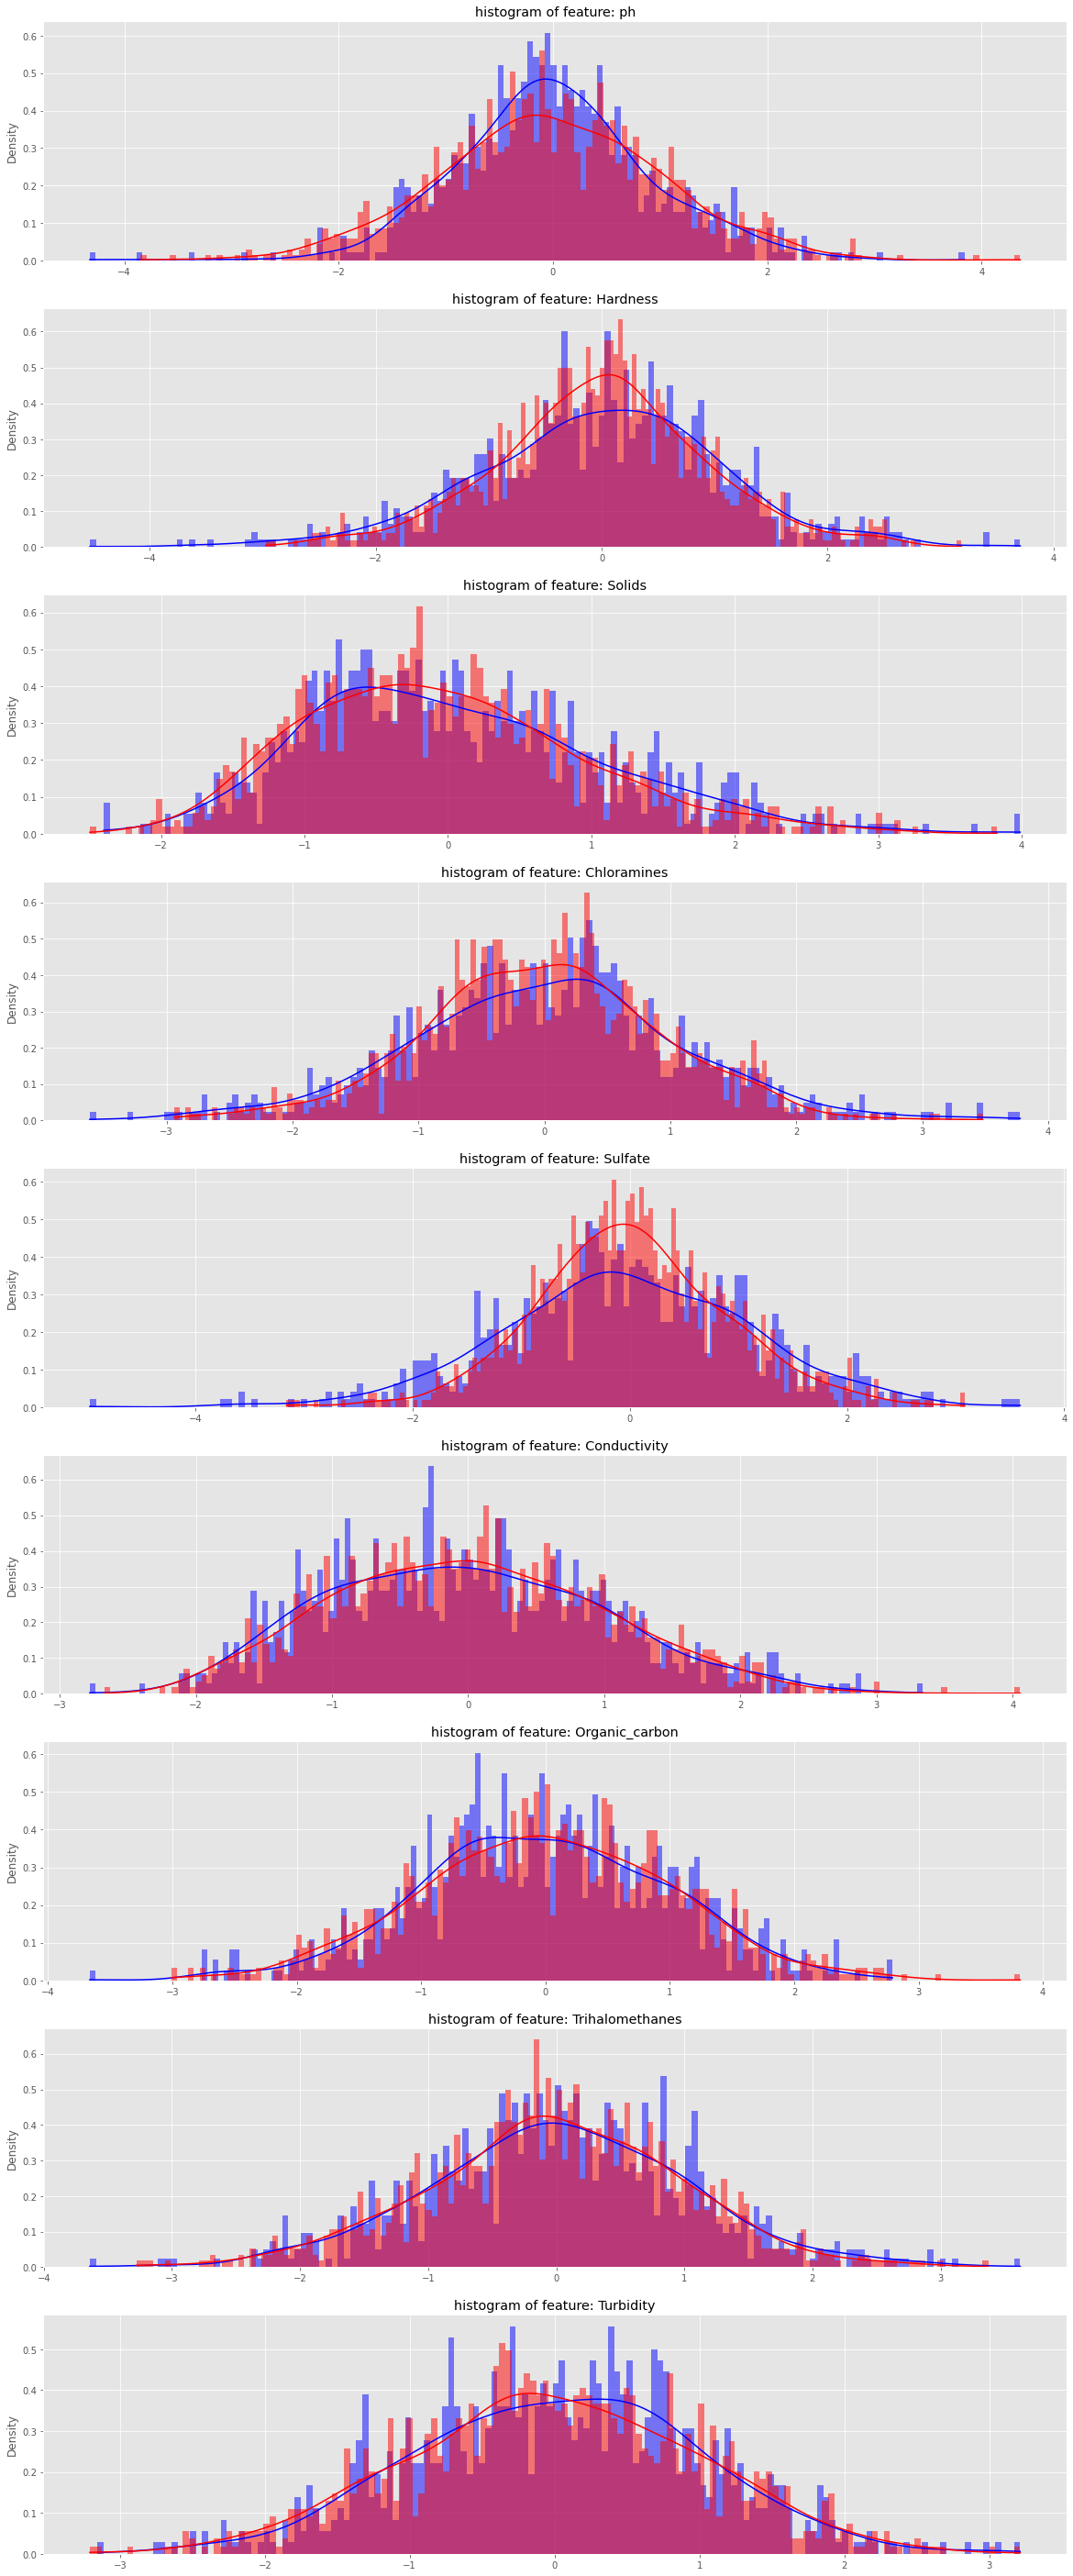

Here blue Potable and red non potable


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2116.000000,2116.000000,2116.000000,2.116000e+03,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,-0.000004,0.000004,-0.000002,-4.725898e-07,0.000004,-0.000003,0.000004,0.000010,-0.000006
std,1.000000,0.999995,1.000001,1.000008e+00,1.000003,0.999992,1.000002,1.000008,1.000001
min,-4.323000,-4.532000,-2.496000,-3.609000e+00,-4.973000,-2.779000,-3.664000,-3.641000,-3.208000
25%,-0.627250,-0.582250,-0.729500,-6.320000e-01,-0.623000,-0.745000,-0.673000,-0.636250,-0.678750
50%,-0.036000,0.036000,-0.113000,8.000000e-03,-0.020500,-0.035000,-0.015000,0.007000,-0.004500
75%,0.618250,0.617000,0.613250,6.170000e-01,0.632000,0.688750,0.698250,0.673250,0.703000
max,4.360000,3.706000,3.990000,3.776000e+00,3.596000,4.055000,3.818000,3.622000,3.214000


In [232]:
#visualizing features the histogram
plt.figure(figsize=(20,20*8))
gs = GridSpec(28, 1)
for i, cn in enumerate(rawData[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(rawData[cn][Potability == 1], bins=150,color = 'blue',kde=True, stat="density", linewidth=0)
    sns.histplot(rawData[cn][Potability == 0], bins=150,color = 'red',kde=True, stat="density", linewidth=0)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()
print("Here blue Potable and red non potable")
rawData.round()
rawData.describe()

# Finding the corelation matrix and analyzing it
here we gonna use the coor_matrix and the visualize it with heat map

The correaltion matrix is:
                        ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.103730 -0.085190    -0.028850  0.018221   
Hardness         0.103730  1.000000 -0.052356    -0.017897 -0.106402   
Solids          -0.085190 -0.052356  1.000000    -0.057318 -0.170344   
Chloramines     -0.028850 -0.017897 -0.057318     1.000000  0.003419   
Sulfate          0.018221 -0.106402 -0.170344     0.003419  1.000000   
Conductivity     0.015614  0.004307 -0.005349    -0.028088 -0.015754   
Organic_carbon   0.027821  0.012125 -0.005464    -0.024852  0.028177   
Trihalomethanes  0.023079 -0.017869 -0.012132     0.013919 -0.025847   
Turbidity       -0.031030 -0.024058  0.018156     0.008204 -0.004570   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.015614        0.027821         0.023079  -0.031030  
Hardness             0.004307        0.012125        -0.017869  -0.024058  
Solids              -0.

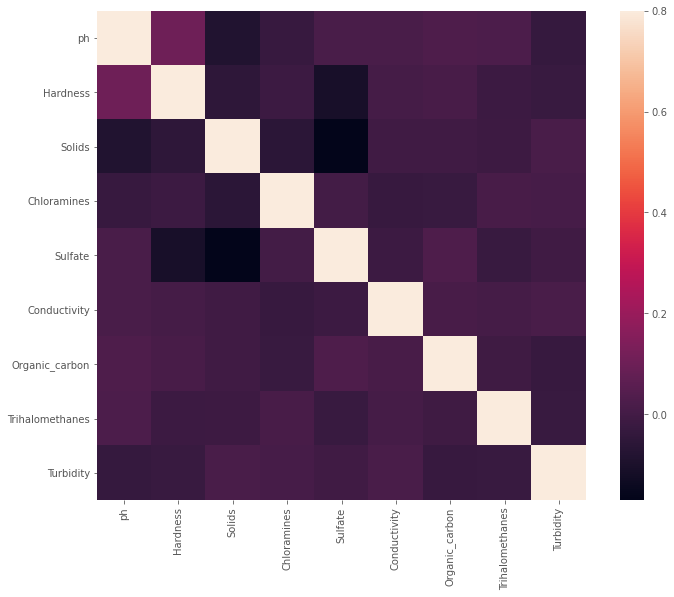

In [233]:
# heat map of correlation of features
correlation_matrix = rawData.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
print("The correaltion matrix is:\n",correlation_matrix)
plt.show()

If any two features having the coeffiecent of correlation between (-0.4,0.4) then it is called that they are correlated and we can drop one of the features as it is reduntant.
But form above observation no two features have correlation in the range (-.04,0.4) so we cannot drop any features we have to use all the features.

# Trying out the Classification
Here the porblem is binary classification so we are trying
Logistic regression

Support vector machine

Random forest

# Logistic regression before removing false positives

In [234]:
model1.fit(X_train, y_train)
y_pred=model1.predict(X_train)
print(y_pred)
print(len(y_pred))
print("Accuracy Score:", metrics.accuracy_score(y_train, y_pred))
y_test_pred=model1.predict(X_test)
model1_acc=metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy Score:",model1_acc)

[0 0 0 ... 0 0 0]
1587
Accuracy Score: 0.6061751732829238
Accuracy Score: 0.6011342155009451


# Removing False Positives and Trying 3 Main Classifiers

here extact the features form the know data of potability of water

There are abnormal data like pH value more than 6.5 and less than 8.5 where potability is 1,So we have to remove those as it adds noise and it leads to ineffecient classification model. Some of this values are: 

1)pH should be in the range (6.5,8.5).

2)hardness should not be more than 75 mg/l.

3)Solids dissloved should not be more than 1000mg/l.

4)Chloramines concentration should not be more than 4mg/l.

5)Sulfate concentration should not be more than 30mg/l.

6)Conductivity should not be more than 400uS/cm.

7)Total organic carbon(TOC) should not be more than 4 mg/l

8)Turbidity should not be more tha 5.00 NTU.

Dropping all the rows which have abnormal data

In [235]:
#here copyData is the data copy of rawData just after
ph = copyData
ph.drop(ph[ ((ph['ph'] <=6.5) |  (ph['ph'] >=8.5)) & (ph['Potability']==1)].index)
ph.drop(ph[ph['Potability']==0].index)
ph

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
2,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
3,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
4,10.223862,248.071735,28749.71654,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
5,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2112,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
2113,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2114,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2115,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [236]:
solid = copyData
solid = solid.drop(solid[(solid['Solids'] >1000) & (solid['Potability']==1)].index)
solid = solid.drop(solid[solid['Potability']==0].index)
solid

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [237]:
solid = copyData
hardness = hardness.drop(hardness[ (hardness['Hardness']>75) & (hardness['Potability']==1)] .index)
hardness = hardness.drop(hardness[hardness['Potability']==0].index)
hardness

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
171,13.175402,47.432000,19237.94968,8.907020,375.147315,500.245952,12.083896,76.257799,4.106924,1
245,9.443359,73.492234,20438.22469,8.024953,315.805659,458.677232,12.538681,50.852470,3.486646,1


In [238]:
chloramines = copyData
chloramines = chloramines.drop(chloramines[ (chloramines['Chloramines']>4) & (chloramines['Potability']==1)].index)
chloramines = chloramines.drop(chloramines[chloramines['Potability']==0].index)
chloramines

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
233,5.374223,201.331440,19410.23376,3.239580,384.562838,350.178040,13.451089,43.089726,3.642778,1
266,6.443754,196.615992,25740.41259,2.484380,435.672765,352.353623,16.924419,33.051888,4.498685,1
468,0.227499,152.530111,39028.59934,3.462492,283.693782,443.029232,13.201943,62.322711,3.545741,1
485,8.581429,186.601621,20590.71211,3.924183,366.131900,384.305698,9.999398,66.693973,3.388448,1
496,6.769835,177.173258,34596.00187,2.866073,369.532996,389.516286,17.268074,64.868608,3.655790,1
522,4.739549,162.246886,27215.90274,2.862535,372.815075,437.217590,15.130476,65.091291,2.942348,1
718,7.269652,155.157520,31161.36839,3.181183,244.795198,506.010135,17.385515,73.115053,3.789237,1
722,6.879959,163.593339,44586.81265,2.741712,219.148935,554.045104,16.521942,67.533260,5.688207,1
728,6.850302,167.985040,40588.43383,3.372369,265.431121,300.411744,16.005207,72.363217,3.080297,1
742,8.722144,151.621132,28301.51695,3.651961,248.094759,468.367451,15.151173,79.538368,3.274629,1


In [239]:
sulfate = copyData
sulfate = sulfate.drop(sulfate[ (sulfate['Sulfate']>30) & (sulfate['Potability']==1) ].index)
sulfate = sulfate.drop(sulfate[sulfate['Potability']==0].index)
sulfate

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [240]:
conductivity = copyData
conductivity = conductivity.drop(conductivity[ (conductivity['Conductivity']>400) & (conductivity['Potability']==1)].index)
conductivity = conductivity.drop(conductivity[conductivity['Potability']==0].index)
conductivity

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
162,6.800119,242.008082,39143.403330,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
163,7.174135,203.408935,20401.102460,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
165,8.322987,207.252462,28049.646280,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1
168,4.997771,280.082411,26849.194740,6.130757,374.232961,297.611540,15.571571,70.560275,3.404633,1
173,7.788055,212.691457,29879.060150,6.998962,360.668259,359.569081,14.828743,83.856336,3.368757,1
...,...,...,...,...,...,...,...,...,...,...
2102,8.862113,131.635177,17433.601850,7.639573,340.133165,399.462844,16.712206,53.594104,4.955082,1
2103,6.008974,225.080234,5100.094173,7.452236,336.119000,325.134492,11.079952,36.341012,4.012340,1
2105,6.683368,272.111698,18989.316770,5.336202,336.555100,307.725009,20.178716,75.402260,5.208061,1
2112,8.989900,215.047358,15921.412020,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1


In [241]:
carbon = copyData
carbon = carbon.drop(carbon[ (carbon['Organic_carbon']>4) & (carbon['Potability']==1)].index)
carbon = carbon.drop(carbon[carbon['Potability']==0].index)
carbon

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
505,5.140801,209.358561,21407.61429,4.415976,230.555856,378.89719,2.2,86.737223,4.192257,1


In [242]:
turbid = copyData
turbid = turbid.drop(turbid[ (turbid['Turbidity']>5) & (turbid['Potability']==1)].index)
turbid = turbid.drop(turbid[turbid['Potability']==0].index)
turbid

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
160,9.445130,145.805402,13168.52916,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
161,9.024845,128.096691,19859.67648,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
162,6.800119,242.008082,39143.40333,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
163,7.174135,203.408935,20401.10246,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
164,7.657991,236.960889,14245.78912,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1
...,...,...,...,...,...,...,...,...,...,...
2112,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
2113,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2114,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2115,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


From the above data it is effective drop the features like solid,hardness,Organic_carbon and Sulfate as it gives abnormal data and using it in the algorithm makes it ineffective.

In [243]:
copyData.drop(['Solids','Hardness','Organic_carbon','Sulfate',],axis = 1,inplace= True)
copyData

,ph,Chloramines,Conductivity,Trihalomethanes,Turbidity,Potability
1,8.316766,8.059332,363.266516,100.341674,4.628771,0
2,9.092223,6.546600,398.410813,31.997993,4.075075,0
3,5.584087,7.544869,280.467916,54.917862,2.559708,0
4,10.223862,7.513408,283.651634,84.603556,2.672989,0
5,8.635849,4.563009,474.607645,62.798309,4.401425,0
...,...,...,...,...,...,...
2112,8.989900,6.297312,390.410231,55.069304,4.613843,1
2113,6.702547,7.708117,329.266002,28.878601,3.442983,1
2114,11.491011,9.263166,439.893618,41.558501,4.369264,1
2115,6.069616,7.747547,415.886955,60.419921,3.669712,1


In [244]:
#normalizing the data
Potability = copyData['Potability']
copyData.drop('Potability',axis =1 ,inplace = True)
copyData = (copyData - copyData.mean())/copyData.std()
print("The mean of Data:\n",copyData.mean())
print("The standard deviation of Data:\n",copyData.std())
#rounding all the vlaues to three decimal place
copyData = copyData.round(3)
copyData.head()

The mean of Data:
 ph                 2.575130e-16
Chloramines        3.779313e-15
Conductivity       3.699834e-15
Trihalomethanes   -6.039948e-15
Turbidity          1.638418e-15
dtype: float64
The standard deviation of Data:
 ph                 1.0
Chloramines        1.0
Conductivity       1.0
Trihalomethanes    1.0
Turbidity          1.0
dtype: float64


,ph,Chloramines,Conductivity,Trihalomethanes,Turbidity
1,0.777,0.587,-0.777,2.133,0.839
2,1.266,-0.365,-0.342,-2.167,0.134
3,-0.945,0.264,-1.803,-0.725,-1.795
4,1.980,0.244,-1.763,1.143,-1.651
5,0.978,-1.613,0.602,-0.229,0.549


# Trying random forest

In [245]:
#Create a Gaussian Classifier
clf=RandomForestClassifier()

X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(y_pred)
print((y_pred).sum())

[1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 

In [246]:
# Model Accuracy, how often is the classifier correct?
rf_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",rf_acc,"%")

Accuracy: 0.665406427221172 %


# Trying Logistic regression

In [247]:
#model1 is Logistic regression
model1.fit(X_train, y_train)
y_pred=model1.predict(X_train)
print("Accuracy Score:", metrics.accuracy_score(y_train, y_pred))
lf_acc= metrics.accuracy_score(y_train,y_pred)

Accuracy Score: 0.6061751732829238


# Trying Suppport vector machine with linear kernel

In [248]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
svm_acc = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.6049149338374291


# Analyzing accuray of different classifier

{'Logistic': 60.61751732829238, 'RF': 66.5406427221172, 'SVM': 60.49149338374291}


(60.0, 70.0)

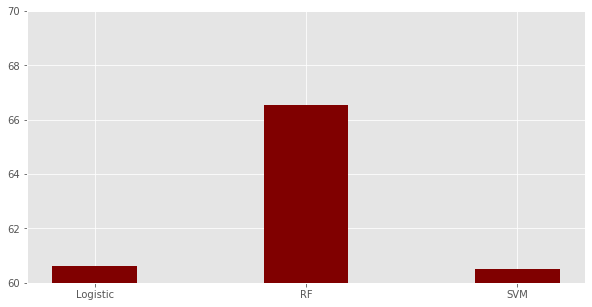

In [249]:
accuracies = {'Logistic':lf_acc*100,'RF':rf_acc*100,'SVM':svm_acc*100}
fig = plt.figure(figsize = (10, 5))
print(accuracies)
# creating the bar plot
plt.bar(accuracies.keys(), accuracies.values(), color ='maroon',
        width = 0.4)
plt.ylim(60,70)